### Selecting columns, viualizing

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [2]:
data = pd.read_csv("../dat/data_clean_new.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273543 entries, 0 to 273542
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tconst                       273543 non-null  object 
 1   titleType                    273543 non-null  object 
 2   primaryTitle                 273543 non-null  object 
 3   originalTitle                273543 non-null  object 
 4   isAdult                      273543 non-null  int64  
 5   startYear                    273543 non-null  object 
 6   endYear                      273543 non-null  object 
 7   runtimeMinutes               273543 non-null  object 
 8   genres                       273543 non-null  object 
 9   averageRating                273543 non-null  float64
 10  numVotes                     273543 non-null  int64  
 11  Budget                       49881 non-null   float64
 12  Gross US & Canada            18982 non-null   float64
 13 

In [4]:
def clean_unknowns(row, column):
    if row[column] == "\\N":
        return None
    else:
        return row[column]

data["startYear"] = data.apply(lambda row: clean_unknowns(row, "startYear"), axis=1)
data["startYear"] = pd.to_numeric(data["startYear"])

In [5]:
filtered = data[["startYear", "Budget", "Gross worldwide", "averageRating"]].dropna()
print(len(filtered))
print()

14674



In [10]:
lst = []
years = []
n = []
for year in range(1960, 2022):
    if len(filtered[filtered["startYear"] == year]) == 0: continue
    years.append(year)
    lst.append(len(filtered[(filtered["startYear"] == year) & (filtered["Budget"] > filtered["Gross worldwide"])]) / len(filtered[filtered["startYear"] == year]))
    n.append(len(filtered[(filtered["startYear"] == year)]))

    
np.save("../plt/data_fig2/flop_rate.npy", lst)
np.save("../plt/data_fig2/years.npy", years)
np.save("../plt/data_fig2/num_movies.npy", n)

7.23468840391206e-10


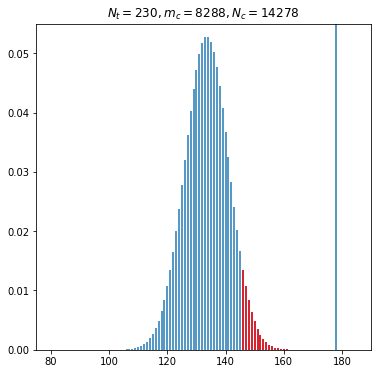

In [14]:
from scipy.stats import betabinom
# Bonferroni correction
n_1 = len(filtered[filtered["startYear"] == 2020])
m_0 = len(filtered[(filtered["startYear"] < 2020) & (filtered["Budget"] > filtered["Gross worldwide"])])
n_0 = len(filtered[filtered["startYear"] < 2020])
p = betabinom(n_1, m_0 + 1, n_0 - m_0 + 1)

mm_1 = np.arange(n_1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f"$N_t = {n_1}, m_c = {m_0}, N_c = {n_0}$")
ax.vlines(mm_1, 0, p.pmf(mm_1))

m_2020 = len(filtered[(filtered["startYear"] == 2020) & (filtered["Budget"] > filtered["Gross worldwide"])])
ax.axvline(m_2020)
print(1 - betabinom.cdf(m_2020- 1, n_1, m_0 + 1, n_0 - m_0 + 1))

mm_1_r = mm_1[mm_1 >= betabinom.ppf(0.95, n_1, m_0 + 1, n_0 - m_0 + 1)]
ax.vlines(mm_1_r, 0, p.pmf(mm_1_r), color="red")
ax.set_xlim(75, 190)
ax.set_ylim(0, 0.055)

hypotest_data = np.array([n_1, m_0, n_0, m_2020])
np.save("../plt/data_fig2/hypotest_data.npy",hypotest_data)

0.0010163364552668863


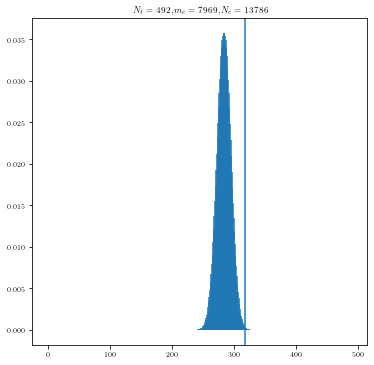

In [13]:
from scipy.stats import betabinom
# Bonferroni correction
n_1 = len(filtered[filtered["startYear"] == 2019])
m_0 = len(filtered[(filtered["startYear"] < 2019) & (filtered["Budget"] > filtered["Gross worldwide"])])
n_0 = len(filtered[filtered["startYear"] < 2019])
p = betabinom(n_1, m_0 + 1, n_0 - m_0 + 1)
          
mm_1 = np.arange(n_1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f"$N_t = {n_1}, m_c = {m_0}, N_c = {n_0}$")
ax.vlines(mm_1, 0, p.pmf(mm_1))
ax.axvline(len(filtered[(filtered["startYear"] == 2019) & (filtered["Budget"] > filtered["Gross worldwide"])]))
print(1 - betabinom.cdf(len(filtered[(filtered["startYear"] == 2019) & (filtered["Budget"] > filtered["Gross worldwide"])]) - 1, n_1, m_0 + 1, n_0 - m_0 + 1))

9.927068989057375e-08


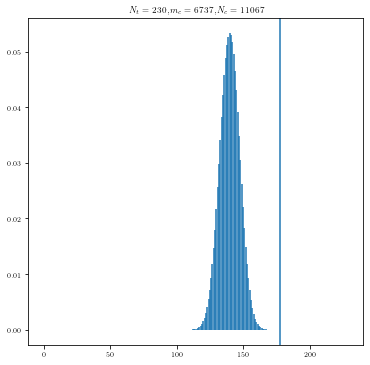

In [14]:
from scipy.stats import betabinom
# Bonferroni correction
n_1 = len(filtered[filtered["startYear"] == 2020])
m_0 = len(filtered[(filtered["startYear"].between(2000, 2019)) & (filtered["Budget"] > filtered["Gross worldwide"])])
n_0 = len(filtered[filtered["startYear"].between(2000, 2019)])
p = betabinom(n_1, m_0 + 1, n_0 - m_0 + 1)

mm_1 = np.arange(n_1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f"$N_t = {n_1}, m_c = {m_0}, N_c = {n_0}$")
ax.vlines(mm_1, 0, p.pmf(mm_1))
ax.axvline(len(filtered[(filtered["startYear"] == 2020) & (filtered["Budget"] > filtered["Gross worldwide"])]))
print(1 - betabinom.cdf(len(filtered[(filtered["startYear"] == 2020) & (filtered["Budget"] > filtered["Gross worldwide"])]) - 1, n_1, m_0 + 1, n_0 - m_0 + 1))

0.045335543892846886


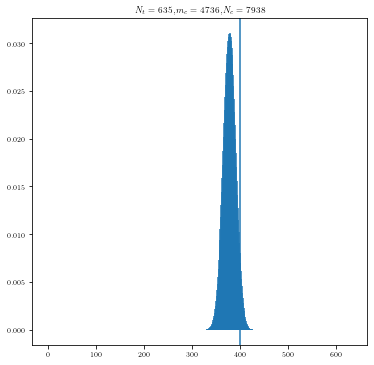

In [15]:
from scipy.stats import betabinom
# Bonferroni correction
n_1 = len(filtered[filtered["startYear"] == 2015])
m_0 = len(filtered[(filtered["startYear"].between(2000, 2014)) & (filtered["Budget"] > filtered["Gross worldwide"])])
n_0 = len(filtered[filtered["startYear"].between(2000, 2014)])
p = betabinom(n_1, m_0 + 1, n_0 - m_0 + 1)

mm_1 = np.arange(n_1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f"$N_t = {n_1}, m_c = {m_0}, N_c = {n_0}$")
ax.vlines(mm_1, 0, p.pmf(mm_1))
ax.axvline(len(filtered[(filtered["startYear"] == 2015) & (filtered["Budget"] > filtered["Gross worldwide"])]))
print(1 - betabinom.cdf(len(filtered[(filtered["startYear"] == 2015) & (filtered["Budget"] > filtered["Gross worldwide"])]) - 1, n_1, m_0 + 1, n_0 - m_0 + 1))

4.2458692117719465e-10
9.102053855358783e-05


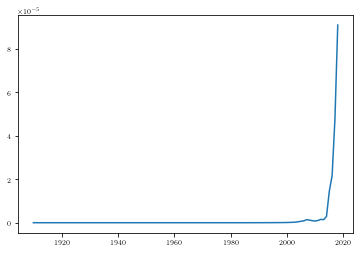

In [16]:
p_values = []
for lower in range(1910, 2019):
    n_1 = len(filtered[filtered["startYear"] == 2020])
    m_0 = len(filtered[(filtered["startYear"].between(lower, 2019)) & (filtered["Budget"] > filtered["Gross worldwide"])])
    n_0 = len(filtered[filtered["startYear"].between(lower, 2019)])
    p_values.append(1 - betabinom.cdf(len(filtered[(filtered["startYear"] == 2020) & (filtered["Budget"] > filtered["Gross worldwide"])]) - 1, n_1, m_0 + 1, n_0 - m_0 + 1))

plt.plot(list(range(1910, 2019)), p_values)
print(min(p_values))
print(max(p_values))

year: 2000
0.16152392289674966
0.9012019457386535



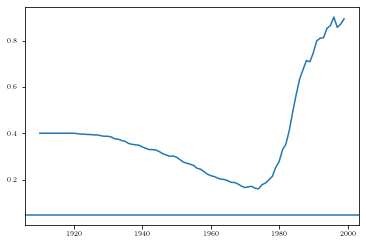

year: 2001
0.000593534470413104
0.17334501288377424



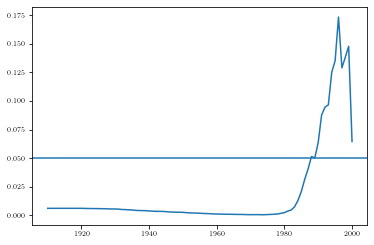

year: 2002
0.00042495654246177406
0.5062503836154106



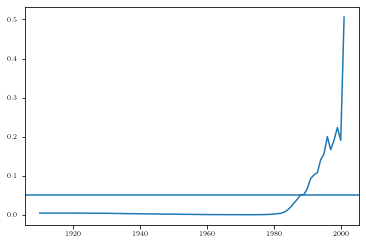

year: 2003
0.2563957801445026
0.9747495231052817



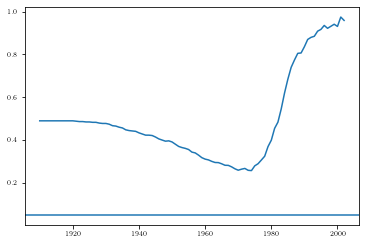

year: 2004
0.00013372664262489842
0.13243564735057334



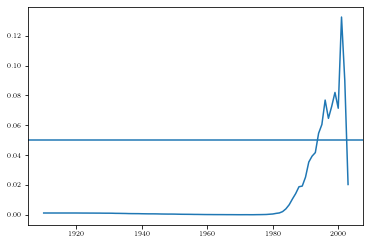

year: 2005
5.262869856381691e-05
0.37713880982525516



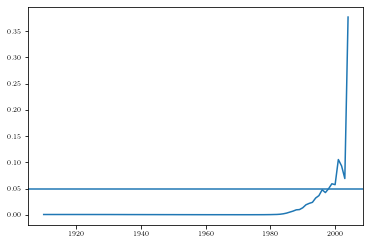

year: 2006
0.0001189875317927358
0.5805031767064912



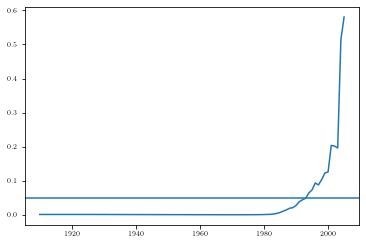

year: 2007
0.0
0.010717465986067931



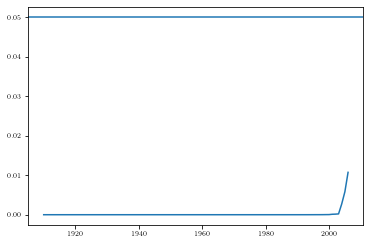

year: 2008
5.713713946420285e-10
0.5215138503136809



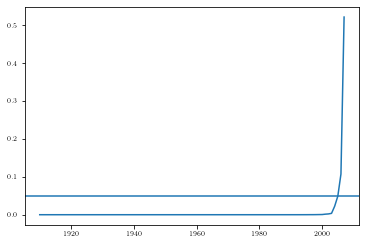

year: 2009
9.061619066219606e-08
0.5718724015669736



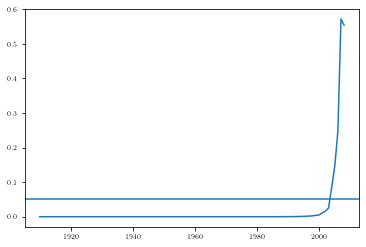

year: 2010
0.002074272508534092
0.9601625464912361



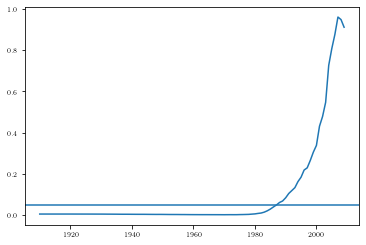

year: 2011
0.0017245386012386676
0.9011669468795576



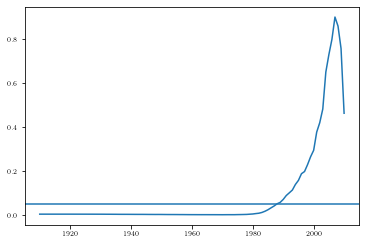

year: 2012
4.071029765373435e-05
0.4042864944353054



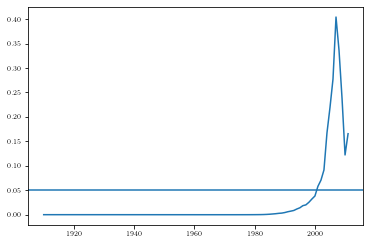

year: 2013
0.018054209930504328
0.9233509034195487



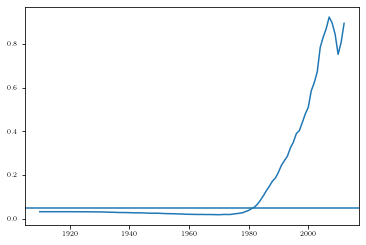

year: 2014
0.3119284619976227
0.9950269812501584



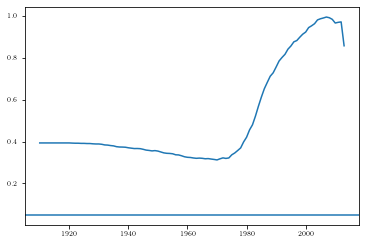

year: 2015
0.0002048393291721462
0.25665670815624064



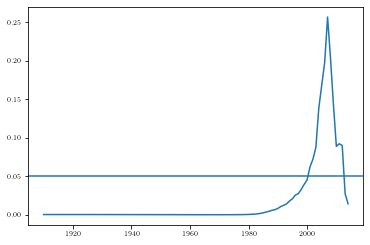

year: 2016
0.0003058033381695413
0.5268934454077083



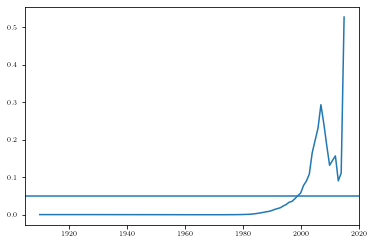

year: 2017
5.749399395305055e-05
0.31551499544180506



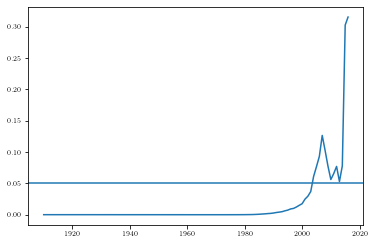

year: 2018
8.826413322127191e-05
0.45605408928402213



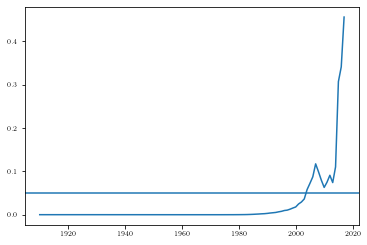

year: 2019
0.0006377213285938543
0.48910643893081995



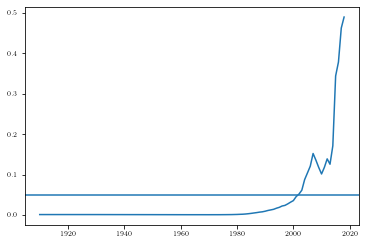

In [17]:
for actual_year in range(2000, 2020):
    print("year:", actual_year)
    p_values = []
    for lower in range(1910, actual_year):
        n_1 = len(filtered[filtered["startYear"] == actual_year])
        m_0 = len(filtered[(filtered["startYear"].between(lower, actual_year - 1)) & (filtered["Budget"] > filtered["Gross worldwide"])])
        n_0 = len(filtered[filtered["startYear"].between(lower, actual_year - 1)])
        p_values.append(1 - betabinom.cdf(len(filtered[(filtered["startYear"] == actual_year) & (filtered["Budget"] > filtered["Gross worldwide"])]) - 1, n_1, m_0 + 1, n_0 - m_0 + 1))

    plt.plot(list(range(1910, actual_year)), p_values)
    plt.axhline(0.05)
    print(min(p_values))
    print(max(p_values))
    print()
    plt.show()

In [18]:
filtered = data[["averageRating", "startYear", "Budget", "Gross worldwide"]].dropna()

threshold = 5  # filtered["averageRating"].mean()
print(threshold)

bad_filtered = filtered[filtered["averageRating"] < threshold] # 5.0]
good_filtered = filtered[filtered["averageRating"] >= threshold]

5


0.19624038479797257


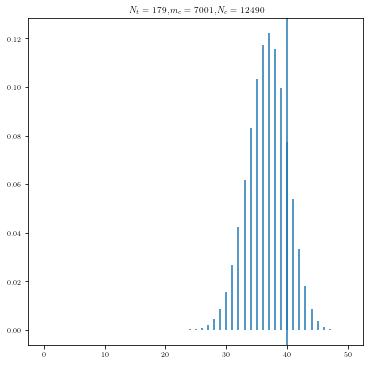

In [23]:
from scipy.stats import betabinom
# Bonferroni correction
n_12 = len(bad_filtered[bad_filtered["startYear"] == 2020])
m_02 = len(bad_filtered[(bad_filtered["startYear"] < 2020) & (bad_filtered["Budget"] > bad_filtered["Gross worldwide"])])
n_02 = len(bad_filtered[bad_filtered["startYear"] < 2020])
p2 = betabinom(n_12, m_02 + 1, n_02 - m_02 + 1)
          
mm_12 = np.arange(n_12)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f"$N_t = {n_1}, m_c = {m_0}, N_c = {n_0}$")
ax.vlines(mm_12, 0, p2.pmf(mm_12))
ax.axvline(len(bad_filtered[(bad_filtered["startYear"] == 2020) & (bad_filtered["Budget"] > bad_filtered["Gross worldwide"])]))
print(1 - betabinom.cdf(len(bad_filtered[(bad_filtered["startYear"] == 2020) & (bad_filtered["Budget"] > bad_filtered["Gross worldwide"])]) - 1, n_12, m_02 + 1, n_02 - m_02 + 1))
# The rate of flopping for bad movies didn't change

4.453395097137047e-09


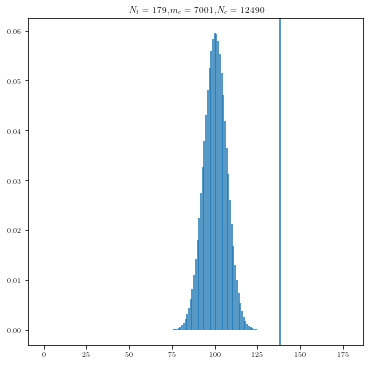

In [21]:
from scipy.stats import betabinom
# Bonferroni correction
n_1 = len(good_filtered[good_filtered["startYear"] == 2020])
m_0 = len(good_filtered[(good_filtered["startYear"] < 2020) & (good_filtered["Budget"] > good_filtered["Gross worldwide"])])
n_0 = len(good_filtered[good_filtered["startYear"] < 2020])
p = betabinom(n_1, m_0 + 1, n_0 - m_0 + 1)
          
mm_1 = np.arange(n_1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f"$N_t = {n_1}, m_c = {m_0}, N_c = {n_0}$")
ax.vlines(mm_1, 0, p.pmf(mm_1))
ax.axvline(len(good_filtered[(good_filtered["startYear"] == 2020) & (good_filtered["Budget"] > good_filtered["Gross worldwide"])]))
print(1 - betabinom.cdf(len(good_filtered[(good_filtered["startYear"] == 2020) & (good_filtered["Budget"] > good_filtered["Gross worldwide"])]) - 1, n_1, m_0 + 1, n_0 - m_0 + 1))